
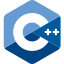
<br>

<div style="text-align:center; font-size:200%;">
  <b>Test-Doubles</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 07 Test-Doubles.ipynb -->
<!-- slides/module_410_unit_testing/topic_162_test_doubles.cpp -->


## Test Doubles

- Simplified version of a dependency in the system
  - e.g. replace a database query with a fixed value
- Test Doubles are important for simplifying tests
- They typically require an interface that they implement
- But: too many or complex test doubles make tests confusing
  - What is actually being tested by a test?


## Types of Test Doubles

- Outgoing dependencies ("Mocks")
  - Mocks
  - Spies
- Incoming dependencies ("Stubs")
  - Dummies
  - Stubs
  - Fakes


## Dummy

- Object that only serves as a placeholder
- Passed, but not used
- In C++ sometimes `nullptr`
- Also for outgoing dependencies


## Stub

- Object that provides a minimal implementation of a dependency
- Typically always returns the same value
- Used to
  - replace complex dependencies
  - make tests deterministic


## Fake

- Object that provides a simpler implementation of a dependency
- Can be e.g. an in-memory database
- Used to
  - speed up tests
  - simplify test configuration


## Spy

- Object that stores information about the interaction with it
- Used to
  - check if a dependency is used correctly


## Mock

- Object that stores information about the expected interaction
- Typically declaratively configurable
- Automated implementation of spies
- Used to
  - check if a dependency is used correctly


## Typical use of test doubles:

- database access, file system access
- time, random values
- non-determinism
- hidden state


## Workshop: Test Doubles

We have the following interfaces, which are used by the function `test_me()`:

In [ ]:
class Service1
{
public:
    virtual ~Service1() = default;
    virtual int get_value() = 0;
};

In [ ]:
class Service2
{
public:
    virtual ~Service2() = default;
    virtual void set_value(int value) = 0;
};

In [ ]:
void test_me(int i, int j, Service1* service1, Service2* service2)
{
    int value{};
    if (i > 0)
    {
        value = service1->get_value();
    }
    if (j > 0)
    {
        service2->set_value(value);
    }
}


What types of test doubles do you need to test the function `test_me()` for
the given values of `i` and `j`?

| i | j | Service1 | Service2 |
|---|---|----------|----------|
| 0 | 0 |          |          |
| 0 | 1 |          |          |
| 1 | 0 |          |          |
| 1 | 1 |          |          |


Implement the corresponding doubles and write the tests